In [54]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [55]:
# Collect all data
files = os.listdir('Data')

data = []
for file in files:
    data.append(np.genfromtxt(os.path.join('Data', file), delimiter=',', skip_header=6, names=True))

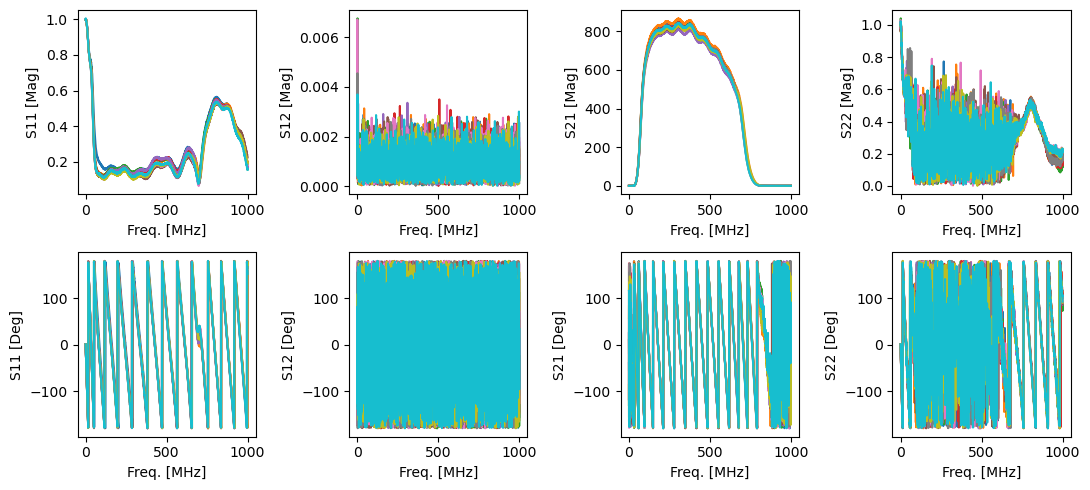

In [3]:
# Display all unmodified data 
fig, axs = plt.subplots(2, 4, figsize=(11, 5))

param_names = ['S11', 'S12', 'S21', 'S22']

for ax, str in zip(axs[0], param_names):
    ax.set_xlabel('Freq. [MHz]')
    ax.set_ylabel(str + ' [Mag]')
    for i in range(len(data)):
        ax.plot(data[0]['FreqHz']/1e6, data[i][str+'MAG'])

for ax, str in zip(axs[1], param_names):
    ax.set_xlabel('Freq. [MHz]')
    ax.set_ylabel(str + ' [Deg]')
    for i in range(len(data)):
        ax.plot(data[0]['FreqHz']/1e6, data[i][str+'DEG'])

fig.tight_layout()

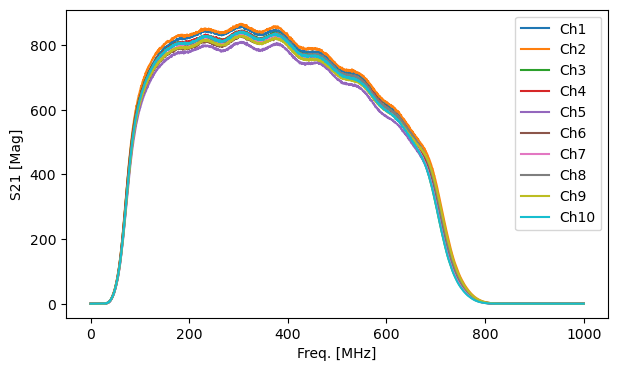

In [83]:
# Only amplification magnitude
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_xlabel('Freq. [MHz]')
ax.set_ylabel('S21 [Mag]')
for i in range(len(data)):
    ax.plot(data[0]['FreqHz']/1e6, data[i]['S21MAG'], label='Ch{}'.format(i+1))
ax.legend()

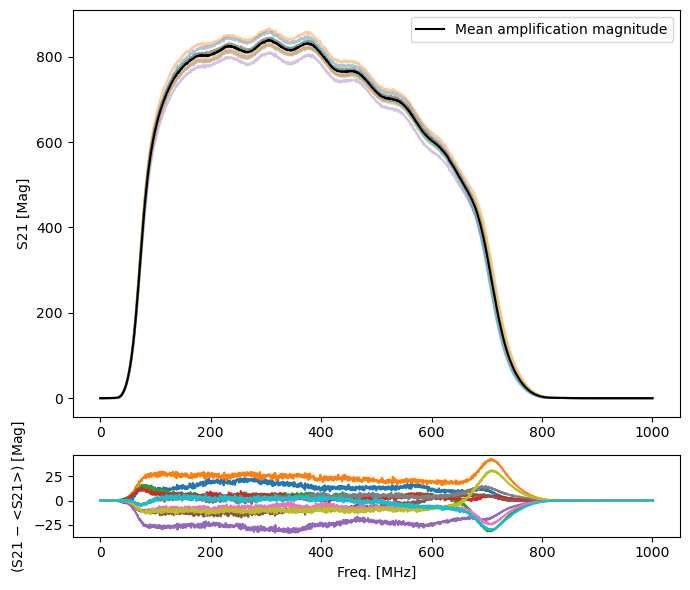

In [236]:
# Mean amplification magnitude 

sum_mag_perFreq = []
for num in range(len(data[0]['FreqHz'])): 
    _ = [data[i]['S21MAG'][num] for i in range(len(data))]
    s = np.sum(_)
    sum_mag_perFreq.append(s)
mean_S21_mag = np.array(sum_mag_perFreq)/len(data)

diff_to_mean = []
for i in range(len(data)):
    diff = [data[i]['S21MAG'][num] - mean_S21_mag[num] for num in range(len(data[0]['FreqHz']))]
    diff_to_mean.append(diff)

fig, axs = plt.subplots(2, 1, figsize=(7, 6), height_ratios=[5, 1])
axs[0].set_ylabel('S21 [Mag]')
for i in range(len(data)):
    axs[0].plot(data[0]['FreqHz']/1e6, data[i]['S21MAG'], alpha=0.4)
axs[0].plot(data[0]['FreqHz']/1e6, mean_S21_mag, color='k', label='Mean amplification magnitude')
axs[0].legend()

axs[1].set_xlabel('Freq. [MHz]')
axs[1].set_ylabel(r'(S21 $-$ <S21>) [Mag]')
for i in range(len(diff_to_mean)):
    axs[1].plot(data[0]['FreqHz']/1e6, diff_to_mean[i])

fig.tight_layout()

In [74]:
# Bandwidths

# Cutoff frequencies at 1/sqrt(2) of maximum
cutoff_mags = []
for i in range(len(data)):
    theo_cutoff_mag = 1/np.sqrt(2) * max(data[i]['S21MAG'])
    data_left = [data[i]['S21MAG'][j] for j in range(1000)]
    data_right = [data[i]['S21MAG'][j] for j in range(1000, 2001)]
    cutoff_mag_left = min(data_left, key=lambda x:abs(x-theo_cutoff_mag))
    cutoff_mag_right = min(data_right, key=lambda x:abs(x-theo_cutoff_mag))
    cutoff_mags.append([cutoff_mag_left, cutoff_mag_right])

bandwidths = [] # MHz
for i in range(len(data)):
    cutoff_index_left = np.where(data[i]['S21MAG'] == cutoff_mags[i][0])[0][0]
    cutoff_index_right = np.where(data[i]['S21MAG'] == cutoff_mags[i][1])[0][0]

    cutoff_freq_left = data[i]['FreqHz'][cutoff_index_left]
    cutoff_freq_right = data[i]['FreqHz'][cutoff_index_right]

    bandwidths.append((cutoff_freq_right - cutoff_freq_left)/1e6)


/var/folders/b3/j0sptnwd487876b69fwn327r0000gn/T/ipykernel_46370/245693765.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels([r'$-2\sigma$', r'$-1\sigma$', '0', r'$1\sigma$', r'$2\sigma$'])


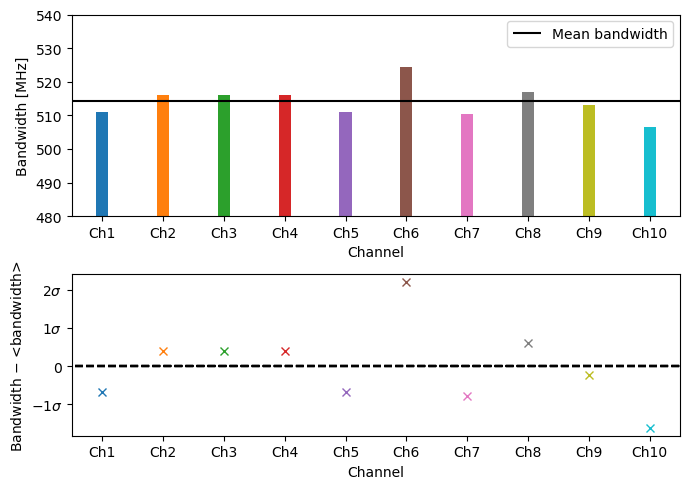

In [263]:
channels = ['Ch{}'.format(i) for i in range(1, 11)]
mean_bandw = np.mean(bandwidths)
std_bandw = np.std(bandwidths)

fig, axs = plt.subplots(2, 1, figsize=(7, 5), height_ratios=(5, 4))

axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Bandwidth [MHz]')
axs[0].set_ylim(ymin=480, ymax=540)
axs[0].set_xlim(xmin=-0.5, xmax=9.5)
for i in range(len(channels)):
    axs[0].bar(channels[i], bandwidths[i], width=0.2)
axs[0].hlines(y=mean_bandw, xmin=-1, xmax=10, colors='k', label='Mean bandwidth')
axs[0].legend()

axs[1].set_xlabel('Channel')
axs[1].set_ylabel(r'Bandwidth $-$ <bandwidth>')
axs[1].set_xlim(xmin=-0.5, xmax=9.5)
for i in range(len(channels)):
    axs[1].plot(channels[i], (bandwidths[i] - mean_bandw)/std_bandw, linestyle='', marker='x')
    axs[1].hlines(y=0, xmin=-1, xmax=10, colors='k', linestyle='--')
axs[1].set_yticklabels([r'$-2\sigma$', r'$-1\sigma$', '0', r'$1\sigma$', r'$2\sigma$'])

fig.tight_layout()

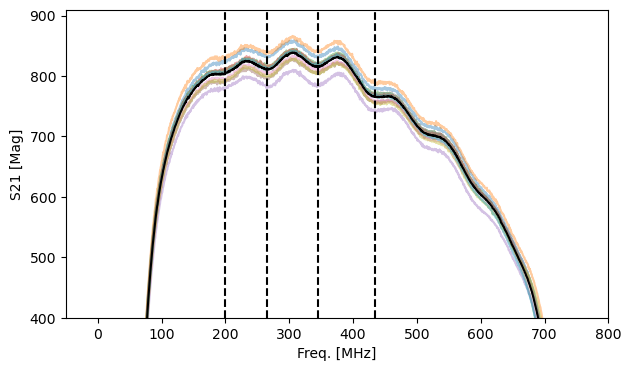

In [210]:
# Resonance frequencies (visualize for easy find first, then compare between amps)

# Set boundaries around visible supposed resonance frequencies for local estimation later 
sum_mag_perFreq = []
for num in range(len(data[0]['FreqHz'])): 
    _ = [data[i]['S21MAG'][num] for i in range(len(data))]
    s = np.sum(_)
    sum_mag_perFreq.append(s)
mean_S21_mag = np.array(sum_mag_perFreq)/len(data)

fig, ax = plt.subplots(figsize=(7, 4))
ax.set_ylabel('S21 [Mag]')
ax.set_xlabel('Freq. [MHz]')
for i in range(len(data)):
    ax.plot(data[0]['FreqHz']/1e6, data[i]['S21MAG'], alpha=0.4)
ax.plot(data[0]['FreqHz']/1e6, mean_S21_mag, color='k')
ax.set_ylim(ymin=400)
ax.set_xlim(xmax=800)
ax.axvline(x=200, color='k', linestyle='--')
ax.axvline(x=265, color='k', linestyle='--')
ax.axvline(x=345, color='k', linestyle='--')
ax.axvline(x=435, color='k', linestyle='--')

In [205]:
# Search local maxima to find resonance frequencies

boundary_index = np.round((np.array([200, 265, 345, 435]) 
                           - min(data[0]['FreqHz']/1e6)) * len(data[0])/max(data[0]['FreqHz']/1e6), 0)
b_int = boundary_index.astype(int)

maxima = [[max(data[i]['S21MAG'][b_int[0]:b_int[1]]), max(data[i]['S21MAG'][b_int[1]:b_int[2]]), max(data[i]['S21MAG'][b_int[2]:b_int[3]])] for i in range(len(data))]

res_freq = []
for i in range(len(data)):
    res_freq.append([data[i]['FreqHz'][np.where(data[i]['S21MAG'] == maxima[i][j])[0][0]]/1e6 for j in range(len(maxima[i]))])

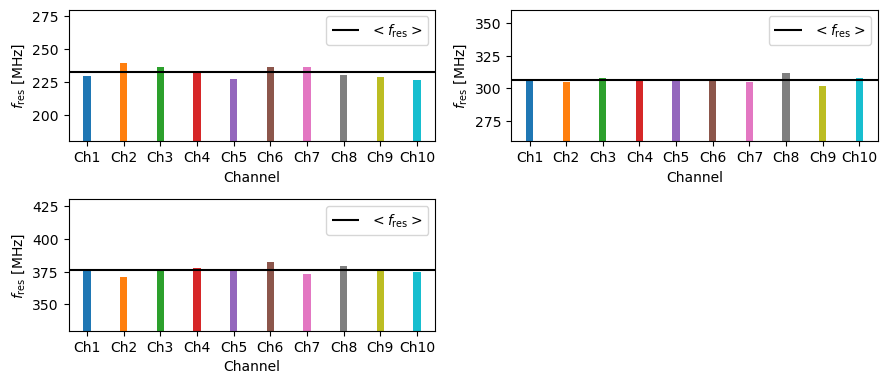

In [280]:
channels = ['Ch{}'.format(i) for i in range(1, 11)]

fig, axs = plt.subplots(2, 2, figsize=(9, 4))

axs[0, 0].set_xlabel('Channel')
axs[0, 0].set_ylabel(r'$f_{\rm res}$ [MHz]')
axs[0, 0].set_ylim(ymin=180, ymax=280)
axs[0, 0].set_xlim(xmin=-0.5, xmax=9.5)
for i in range(len(channels)):
    axs[0, 0].bar(channels[i], res_freq[i][0], width=0.2)
axs[0, 0].hlines(y=np.mean([res_freq[i][0] for i in range(len(channels))]), xmin=-1, xmax=10, color='k', label=r'$<f_{\rm res}>$')
axs[0, 0].legend()

axs[0, 1].set_xlabel('Channel')
axs[0, 1].set_ylabel(r'$f_{\rm res}$ [MHz]')
axs[0, 1].set_ylim(ymin=260, ymax=360)
axs[0, 1].set_xlim(xmin=-0.5, xmax=9.5)
for i in range(len(channels)):
    axs[0, 1].bar(channels[i], res_freq[i][1], width=0.2)
axs[0, 1].hlines(y=np.mean([res_freq[i][1] for i in range(len(channels))]), xmin=-1, xmax=10, color='k', label=r'$<f_{\rm res}>$')
axs[0, 1].legend()

axs[1, 0].set_xlabel('Channel')
axs[1, 0].set_ylabel(r'$f_{\rm res}$ [MHz]')
axs[1, 0].set_ylim(ymin=330, ymax=430)
axs[1, 0].set_xlim(xmin=-0.5, xmax=9.5)
for i in range(len(channels)):
    axs[1, 0].bar(channels[i], res_freq[i][2], width=0.2)
axs[1, 0].hlines(y=np.mean([res_freq[i][2] for i in range(len(channels))]), xmin=-1, xmax=10, color='k', label=r'$<f_{\rm res}>$')
axs[1, 0].legend()

axs[1, 1].set_axis_off()
fig.tight_layout()

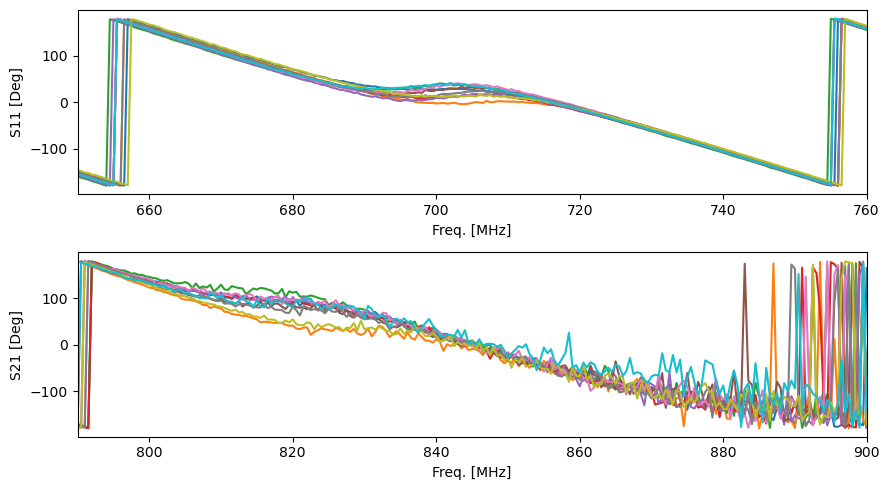

In [49]:
fig, axs = plt.subplots(2, 1, figsize=(9, 5))

# Window for S11 650-760 MHz
axs[0].set_xlabel('Freq. [MHz]')
axs[0].set_ylabel('S11 [Deg]')
for i in range(len(data)):
    axs[0].plot(data[0]['FreqHz']/1e6, data[i]['S11DEG'])
axs[0].set_xlim(xmin=650, xmax=760)

# Window for S21 790-900 MHz 
axs[1].set_xlabel('Freq. [MHz]')
axs[1].set_ylabel('S21 [Deg]')
for i in range(len(data)):
    axs[1].plot(data[0]['FreqHz']/1e6, data[i]['S21DEG'])
axs[1].set_xlim(xmin=790, xmax=900)

fig.tight_layout()